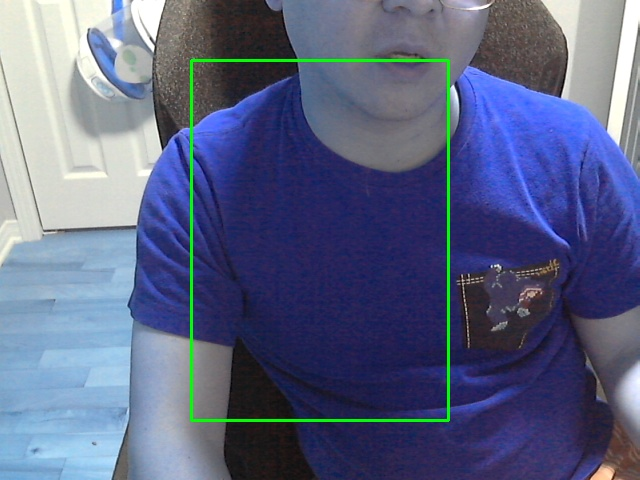

KeyboardInterrupt: 

In [1]:
import cv2
import numpy as np
from IPython.display import display, Image, clear_output

def draw_scaled_vertical_rectangle(img, aspect_ratio, scale, color, thickness):
    # Get image dimensions
    height, width, _ = img.shape

    # Calculate rectangle dimensions
    rect_height = int(height * scale)
    rect_width = int(rect_height * aspect_ratio)

    # Calculate rectangle position
    top_left_x = int((width - rect_width) / 2)
    top_left_y = int((height - rect_height) / 2)
    bottom_right_x = int((width + rect_width) / 2)
    bottom_right_y = int((height + rect_height) / 2)

    # Draw the rectangle (as vertical)
    cv2.rectangle(img, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), color, thickness)
    return img

def display_video_with_scaled_vertical_rectangle():
    cap = cv2.VideoCapture(0)a

    if not cap.isOpened():
        raise Exception("Could not open video capture")

    # Define the bounding box parameters
    aspect_ratio = 2.5 / 3.5
    scale = 0.75
    color = (0, 255, 0)
    thickness = 2

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Draw the scaled vertical rectangle
        frame = draw_scaled_vertical_rectangle(frame, aspect_ratio, scale, color, thickness)

        # Convert the frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Convert the frame to an Image object
        _, buffer = cv2.imencode('.jpg', frame_rgb)
        image = buffer.tobytes()

        # Display the image
        clear_output(wait=True)
        display(Image(data=image))

        # Stop if the cell is interrupted
        if not cap.isOpened():
            break

    cap.release()

display_video_with_scaled_vertical_rectangle()


In [7]:
import cv2
import numpy as np
import os
from IPython.display import display, Image, clear_output
from datetime import datetime

def draw_scaled_vertical_rectangle(img, aspect_ratio, scale, color, thickness):
    height, width, _ = img.shape
    rect_height = int(height * scale)
    rect_width = int(rect_height * aspect_ratio)
    top_left_x = int((width - rect_width) / 2)
    top_left_y = int((height - rect_height) / 2)
    bottom_right_x = int((width + rect_width) / 2)
    bottom_right_y = int((height + rect_height) / 2)
    cv2.rectangle(img, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), color, thickness)
    return (top_left_x, top_left_y, bottom_right_x, bottom_right_y)

def detect_object_in_frame(frame, bbox_coords, aspect_ratio, aspect_ratio_tolerance, rotation_tolerance, save_dir):
    top_left_x, top_left_y, bottom_right_x, bottom_right_y = bbox_coords
    bbox_width = bottom_right_x - top_left_x
    bbox_height = bottom_right_y - top_left_y
    bbox_aspect_ratio = bbox_width / bbox_height
    
    # Convert frame to grayscale for contour detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    detected = False

    # Loop through detected contours
    for contour in contours:
        if cv2.contourArea(contour) > 500:
            rect = cv2.minAreaRect(contour)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            
            # Draw contour and bounding box
            cv2.drawContours(frame, [box], 0, (255, 0, 0), 2)
            
            # Get bounding box properties
            box_width = rect[1][0]
            box_height = rect[1][1]
            box_aspect_ratio = box_width / box_height
            box_angle = rect[2]
            
            # Calculate aspect ratio tolerance
            if abs(box_aspect_ratio - aspect_ratio) < aspect_ratio_tolerance:
                # Check rotation tolerance
                if abs(box_angle) < rotation_tolerance or abs(box_angle - 90) < rotation_tolerance:
                    # Object is within tolerance
                    cv2.putText(frame, "Object Detected", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                    detected = True

    if detected:
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = os.path.join(save_dir, f"detected_{timestamp}.jpg")
        cv2.imwrite(filename, frame)
        print(f"Frame saved as {filename}")

    return frame

def display_video_with_detection(save_dir):
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        raise Exception("Could not open video capture")

    # Define the bounding box parameters
    aspect_ratio = 2.5 / 3.5
    scale = 0.75
    color = (0, 255, 0)
    thickness = 2
    aspect_ratio_tolerance = 0.1
    rotation_tolerance = 10

    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Draw the scaled vertical rectangle
        bbox_coords = draw_scaled_vertical_rectangle(frame, aspect_ratio, scale, color, thickness)

        # Detect objects within the bounding box
        frame = detect_object_in_frame(frame, bbox_coords, aspect_ratio, aspect_ratio_tolerance, rotation_tolerance, save_dir)

        # Convert the frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Convert the frame
        _, buffer = cv2.imencode('.jpg', frame_rgb)
        image = buffer.tobytes()

        # Display the image
        clear_output(wait=True)
        display(Image(data=image))

        # Exit Loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


In [50]:
# Global counter for snapshots
snapshot_counter = 1
save_path = r'C:\Users\Jimmy\Desktop\cb-ds-19\00_Projects\ds-final-project-main\screenshottest'

In [2]:
import cv2
import numpy as np

def draw_scaled_vertical_rectangle(img, aspect_ratio, scale, color, thickness):
    height, width, _ = img.shape
    rect_height = int(height * scale)
    rect_width = int(rect_height * aspect_ratio)
    top_left_x = int((width - rect_width) / 2)
    top_left_y = int((height - rect_height) / 2)
    bottom_right_x = int((width + rect_width) / 2)
    bottom_right_y = int((height + rect_height) / 2)
    cv2.rectangle(img, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), color, thickness)
    return (top_left_x, top_left_y, bottom_right_x, bottom_right_y)

def detect_object_in_frame(frame, bbox_coords, target_aspect_ratio, aspect_ratio_tolerance, rotation_tolerance):
    top_left_x, top_left_y, bottom_right_x, bottom_right_y = bbox_coords
    bbox_width = bottom_right_x - top_left_x
    bbox_height = bottom_right_y - top_left_y
    
    # Convert frame to grayscale for contour detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Loop through detected contours
    for contour in contours:
        if cv2.contourArea(contour) > 500:
            # Approximate the contour to a polygon
            epsilon = 0.02 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)
            
            # Check if the approximated polygon has 4 sides
            if len(approx) == 4:
                # Get the bounding box of the approximated rectangle
                rect = cv2.minAreaRect(contour)
                box = cv2.boxPoints(rect)
                box = np.int0(box)
                
                # Draw contour and bounding box
                cv2.drawContours(frame, [box], 0, (255, 0, 0), 2)
                
                # Get bounding box properties
                box_width = rect[1][0]
                box_height = rect[1][1]
                box_aspect_ratio = box_width / box_height if box_height != 0 else 0
                box_angle = rect[2]
                
                # Check if the detected contour matches the target aspect ratio
                if abs(box_aspect_ratio - target_aspect_ratio) < aspect_ratio_tolerance:
                    # Check rotation tolerance
                    if abs(box_angle) < rotation_tolerance or abs(box_angle - 90) < rotation_tolerance:
                        # Check if the contour area matches the bounding box area
                        bounding_box_area = box_width * box_height
                        contour_area = cv2.contourArea(contour)
                        area_ratio = contour_area / bounding_box_area
                        
                        # Consider the contour as a valid rectangle if its area is close to the bounding box area
                        if 0.8 < area_ratio < 1.2:
                            # Object is within tolerance
                            cv2.putText(frame, "Object Detected", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    return frame


def display_video_with_detection():
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        raise Exception("Could not open video capture")

    # Define the bounding box parameters
    target_aspect_ratio = 2.5 / 3.5
    scale = 0.75
    color = (0, 255, 0)  # Green color
    thickness = 2
    aspect_ratio_tolerance = 0.1
    rotation_tolerance = 10

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Draw the scaled vertical rectangle
        bbox_coords = draw_scaled_vertical_rectangle(frame, target_aspect_ratio, scale, color, thickness)

        # Detect objects within the bounding box
        frame = detect_object_in_frame(frame, bbox_coords, target_aspect_ratio, aspect_ratio_tolerance, rotation_tolerance)

        # Display the image
        cv2.imshow('Video Feed', frame)

        # Exit on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    
display_video_with_detection()


C:\Users\Jimmy\AppData\Local\Temp\ipykernel_51004\4275579765.py:37: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


In [ ]:
def detect_object_in_frame(frame, bbox_coords, target_aspect_ratio, aspect_ratio_tolerance, rotation_tolerance):
    top_left_x, top_left_y, bottom_right_x, bottom_right_y = bbox_coords
    bbox_width = bottom_right_x - top_left_x
    bbox_height = bottom_right_y - top_left_y
    
    # Convert frame to grayscale for contour detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Loop through detected contours
    for contour in contours:
        if cv2.contourArea(contour) > 500:
            # Approximate the contour to a polygon
            epsilon = 0.02 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)
            
            # Check if the approximated polygon has 4 sides
            if len(approx) == 4:
                # Get the bounding box of the approximated rectangle
                rect = cv2.minAreaRect(contour)
                box = cv2.boxPoints(rect)
                box = np.int0(box)
                
                # Draw contour and bounding box
                cv2.drawContours(frame, [box], 0, (255, 0, 0), 2)
                
                # Get bounding box properties
                box_width = rect[1][0]
                box_height = rect[1][1]
                box_aspect_ratio = box_width / box_height if box_height != 0 else 0
                box_angle = rect[2]
                
                # Check if the detected contour matches the target aspect ratio
                if abs(box_aspect_ratio - target_aspect_ratio) < aspect_ratio_tolerance:
                    # Check rotation tolerance
                    if abs(box_angle) < rotation_tolerance or abs(box_angle - 90) < rotation_tolerance:
                        # Check if the contour area matches the bounding box area
                        bounding_box_area = box_width * box_height
                        contour_area = cv2.contourArea(contour)
                        area_ratio = contour_area / bounding_box_area
                        
                        # Consider the contour as a valid rectangle if its area is close to the bounding box area
                        if 0.8 < area_ratio < 1.2:
                            # Object is within tolerance
                            cv2.putText(frame, "Object Detected", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    return frame
